In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import piplite
await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [5]:
await download(filepath, "housing.csv")
file_name="housing.csv"

In [6]:
df = pd.read_csv("housing.csv")

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# Eliminar las columnas "id" y "Unnamed: 0"
df.drop(columns=["id", "Unnamed: 0"], inplace=True)

# Mostrar el resumen estadístico del DataFrame
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
print("Número de valores NaN en la columna 'bedrooms':", df['bedrooms'].isnull().sum())
print("Número de valores NaN en la columna 'bathrooms':", df['bathrooms'].isnull().sum())


Número de valores NaN en la columna 'bedrooms': 13
Número de valores NaN en la columna 'bathrooms': 10


In [11]:
# Reemplazar valores NaN en 'bedrooms' con la media de la columna
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)

# Reemplazar valores NaN en 'bathrooms' con la media de la columna
mean_bathrooms = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean_bathrooms, inplace=True)


In [12]:
print("Número de valores NaN en la columna 'bedrooms' después del reemplazo:", df['bedrooms'].isnull().sum())
print("Número de valores NaN en la columna 'bathrooms' después del reemplazo:", df['bathrooms'].isnull().sum())


Número de valores NaN en la columna 'bedrooms' después del reemplazo: 0
Número de valores NaN en la columna 'bathrooms' después del reemplazo: 0


In [13]:
# Contar el número de casas con valores únicos en la columna 'floors'
floor_counts = df['floors'].value_counts().to_frame()

# Renombrar la columna para mayor claridad
floor_counts.columns = ['count']

# Mostrar el resultado
print(floor_counts)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


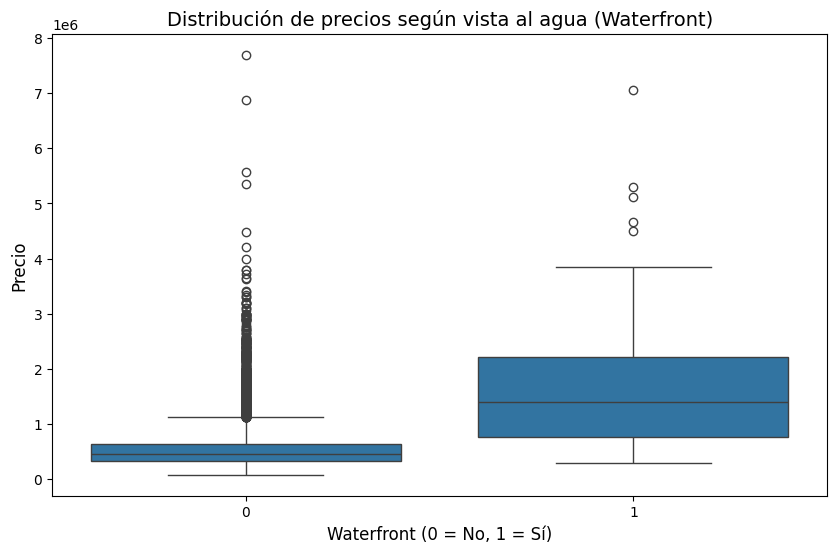

In [14]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10,6))

# Crear el boxplot comparando precios según waterfront (1: tiene vista, 0: no tiene vista)
sns.boxplot(x=df['waterfront'], y=df['price'])

# Agregar título y etiquetas
plt.title("Distribución de precios según vista al agua (Waterfront)", fontsize=14)
plt.xlabel("Waterfront (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Precio", fontsize=12)

# Mostrar el gráfico
plt.show()

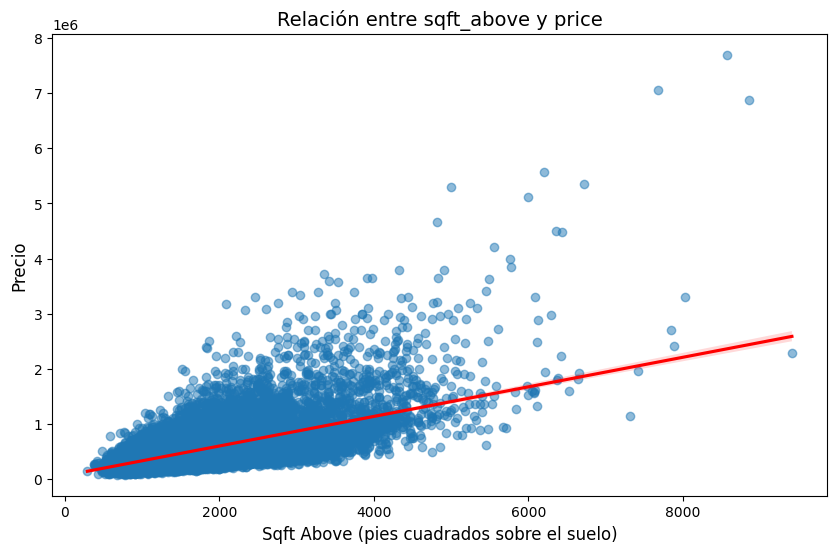

In [15]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10,6))

# Crear el regplot para ver la relación entre sqft_above y price
sns.regplot(x=df['sqft_above'], y=df['price'], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Agregar título y etiquetas
plt.title("Relación entre sqft_above y price", fontsize=14)
plt.xlabel("Sqft Above (pies cuadrados sobre el suelo)", fontsize=12)
plt.ylabel("Precio", fontsize=12)

# Mostrar el gráfico
plt.show()

In [16]:
# Definir la variable independiente (X) y la variable dependiente (Y)
X = df[['sqft_living']]
Y = df['price']

# Crear el modelo de regresión lineal
lm = LinearRegression()

# Ajustar el modelo a los datos
lm.fit(X, Y)

# Calcular el coeficiente de determinación (R^2)
r2_score = lm.score(X, Y)

# Imprimir el valor de R²
print("El valor de R² para la regresión entre sqft_living y price es:", r2_score)

El valor de R² para la regresión entre sqft_living y price es: 0.4928532179037931


In [17]:
# Definir la lista de características (variables independientes)
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Definir X (las características) y Y (el precio)
X = df[features]
Y = df['price']

# Crear el modelo de regresión lineal
lm = LinearRegression()

# Ajustar el modelo a los datos
lm.fit(X, Y)

# Calcular el coeficiente de determinación (R^2)
r2_score = lm.score(X, Y)

# Imprimir el valor de R²
print("El valor de R² para la regresión con múltiples variables es:", r2_score)

El valor de R² para la regresión con múltiples variables es: 0.6576890354915759


In [18]:
# Definir la lista de características
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Definir X (características) y Y (precio)
X = df[features]
Y = df['price']

# Crear la lista de pasos del pipeline
Input = [
    ('scale', StandardScaler()),  # Normalizar los datos
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Generar términos polinómicos
    ('model', LinearRegression())  # Modelo de regresión lineal
]

# Crear el objeto Pipeline
pipe = Pipeline(Input)

# Ajustar el modelo con los datos
pipe.fit(X, Y)

# Calcular R²
r2_score = pipe.score(X, Y)

# Imprimir el valor de R²
print("El valor de R² para el modelo polinómico con pipeline es:", r2_score)

El valor de R² para el modelo polinómico con pipeline es: 0.7512051345272872


In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Definir la lista de características
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Definir X (características) y Y (precio)
X = df[features]
Y = df['price']

# Dividir los datos en entrenamiento (85%) y prueba (15%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Crear el modelo de Ridge con alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Ajustar el modelo con los datos de entrenamiento
ridge_model.fit(x_train, y_train)

# Calcular R² con los datos de prueba
r2_test = ridge_model.score(x_test, y_test)

# Imprimir resultados
print("Número de muestras de prueba:", x_test.shape[0])
print("Número de muestras de entrenamiento:", x_train.shape[0])
print("El valor de R² en los datos de prueba es:", r2_test)


Número de muestras de prueba: 3242
Número de muestras de entrenamiento: 18371
El valor de R² en los datos de prueba es: 0.647875916393907


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Definir la lista de características
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Definir X (características) y Y (precio)
X = df[features]
Y = df['price']

# Dividir los datos en entrenamiento (85%) y prueba (15%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Aplicar transformación polinómica de segundo orden
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)  # Usar transform en test para evitar data leakage

# Crear modelo Ridge con alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Ajustar el modelo con los datos de entrenamiento transformados
ridge_model.fit(x_train_poly, y_train)

# Calcular R² con los datos de prueba transformados
r2_test = ridge_model.score(x_test_poly, y_test)

# Imprimir resultados
print("Número de muestras de prueba:", x_test.shape[0])
print("Número de muestras de entrenamiento:", x_train.shape[0])
print("El valor de R² en los datos de prueba es:", r2_test)


Número de muestras de prueba: 3242
Número de muestras de entrenamiento: 18371
El valor de R² en los datos de prueba es: 0.7002744285222829
